This code was done to automate outputs for a quartelry review presentation regarding how business improved. I coded this to made it easier for me to generate all the graphs and clean the data I need one time without needing to do this through Excel.

This is a code that uses cases done by the whole global team through SFDC. The cases output is an excel file that is ordered chronologically. Cases have been assigned to all team memebers throughtout 3 regions, EMEA, JAPAC, and Americas

This code can be ran once per quarter after editing the quarter and the user if needed to offer comparsions between

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


q4= pd.read_excel(r'CPSD_EMEA_All_Q4FY20_Q1FY21_OppID.xlsx')
print(q4.info())
q4= q4.loc[:, 'Case Number':'Contact Email']
print(q4.info())
q4=q4.loc[q4['Case Owner'] == 'Yehia Gaballah']
q4=q4.loc[q4['Quarter']=='Q1-21']
q4= q4.sort_values('Case Number')
print(q4.head())
q4=q4.reset_index(drop=True)
print(q4.head())
print(q4.columns)

q4['Case Number']=q4['Case Number'].astype(int)
q4=q4.drop(columns=['Date/Time Opened','Date/Time Closed','Business Process Area','Month', 'Number of Configurations'], axis=1)


allignmentdict = {True: 'Allignment', False: 'Non Allignment'}
q4['Allignment']=q4['Country'].isin(['Italy','Spain','Portugal','Norway','Sweden','Ireland'])
q4['Allignment']=q4['Allignment'].replace(allignmentdict)



region=[]
for x in q4['Country']:
    if x=='United States' :
        region.append('Americas')
    elif x=='Canada':
        region.append('Americas')
    elif x=='Mexico':
        region.append('Americas')
    elif x=='Argentina':
        region.append('Americas')
    elif x=='Brazil':
        region.append('Americas')
    elif x=='Chile':
        region.append('Americas')
    elif x=='Colombia':
        region.append('Americas')
    elif x=='Costa Rica':
        region.append('Americas')
    elif x=='Ecuador':
        region.append('Americas')
    elif x=='Dominican Republic':
        region.append('Americas')
    elif x=='India':
        region.append('APJ')
    elif x=='Hong Kong':
        region.append('APJ')
    elif x=='China':
        region.append('APJ')
    elif x=='Korea, Republic of':
        region.append('APJ')
    elif x=='Australia':
        region.append('APJ')
    elif x=='Indonesia':
        region.append('APJ')
    elif x=='Thailand':
        region.append('APJ')
    elif x=='Philippines':
        region.append('APJ') 
    elif x=='Japan':
        region.append('APJ') 
    elif x=='Singapore':
        region.append('APJ') 
    elif x=='Malaysia':
        region.append('APJ') 
    elif x=='Brunei Darussalam':
        region.append('APJ') 
    else:
        region.append('EMEA')
        
q4['Region']=region



q4['Contact Email']=q4['Contact Email'].str.replace("@emc.com", "")
q4['Contact Email']=q4['Contact Email'].str.replace("@dell.com", "")
q4['Contact Email']=q4['Contact Email'].str.replace("@vce.com", "")





alligninemea= q4[ q4['Region']== 'EMEA']

print(q4.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 13 columns):
Case Number                 4550 non-null object
Opportunity Name/Number     3956 non-null object
Case Owner                  4545 non-null object
Date/Time Opened            4545 non-null datetime64[ns]
Date/Time Closed            4545 non-null object
Case Subtype                4545 non-null object
Country                     4545 non-null object
Business Process Area       4545 non-null object
Age (Hours)                 4545 non-null float64
Number of Configurations    4545 non-null float64
Month                       4545 non-null object
Quarter                     4544 non-null object
Contact Email               4419 non-null object
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 462.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 13 columns):
Case Number                 4550 non-null object
Opportunity

First, We imported, cleaned the unwanted data and selected the data that corresponds to My user only and the data that corresponds to the cases I made.

This data has all the extra columns I needed to make apprehended as well. The info line at the end shows the data after being cleaned.

Manual filtering has been used in some cases because there is no list compiling all possible cases (as the case for the country and under which region is it). This can also change from one quarter to the other.

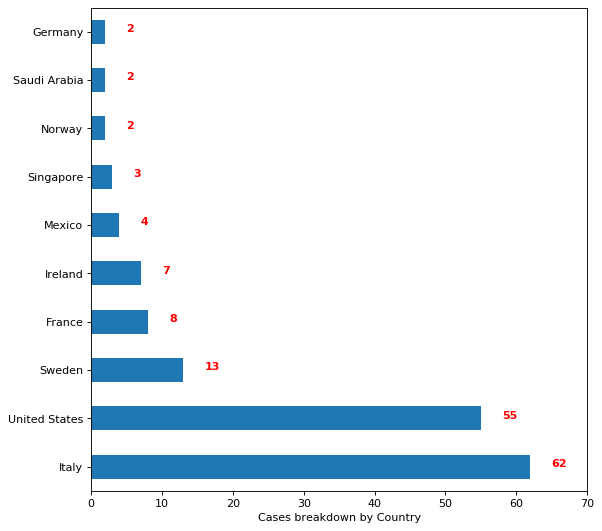

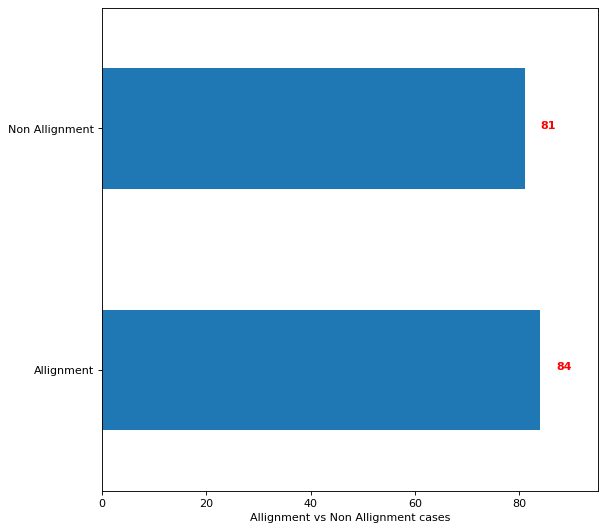

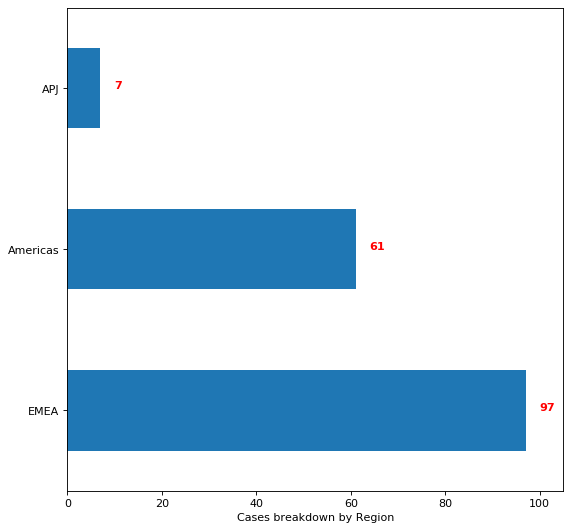

In [7]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=q4['Country'].value_counts()[:10].plot(kind='barh')
ax.set_xlim(0, 70)
ax.set_xlabel('Cases breakdown by Country')
for i, v in enumerate(q4['Country'].value_counts()[:10]):
    ax.text(v+3, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases breakdown by Country.png', dpi=500, bbox_inches='tight')
plt.show()

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=q4['Allignment'].value_counts()[:20].plot(kind='barh')
ax.set_xlim(0, 95)
ax.set_xlabel('Allignment vs Non Allignment cases')
for i, v in enumerate(q4['Allignment'].value_counts()):
    ax.text(v+3, i, str(v), color='Red', fontweight='bold')
plt.savefig('Allignment vs Non Allignment cases.png', dpi=500, bbox_inches='tight')
plt.show()

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=q4['Region'].value_counts()[:20].plot(kind='barh')
ax.set_xlim(0, 105)
ax.set_xlabel('Cases breakdown by Region')
for i, v in enumerate(q4['Region'].value_counts()):
    ax.text(v+3, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases breakdown by Region.png', dpi=500, bbox_inches='tight')
plt.show()



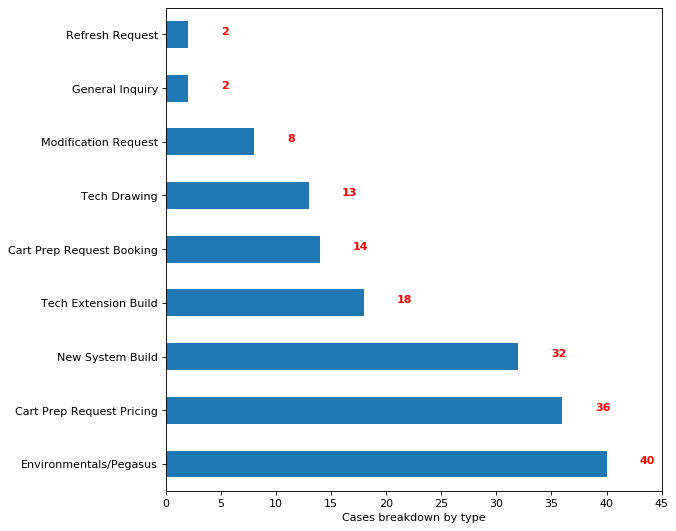

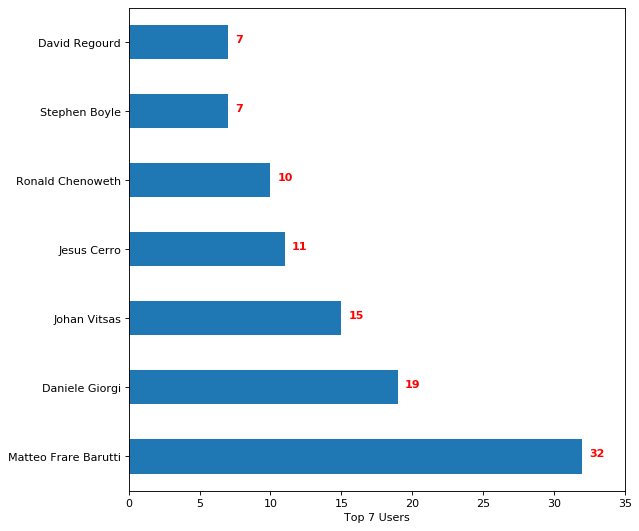

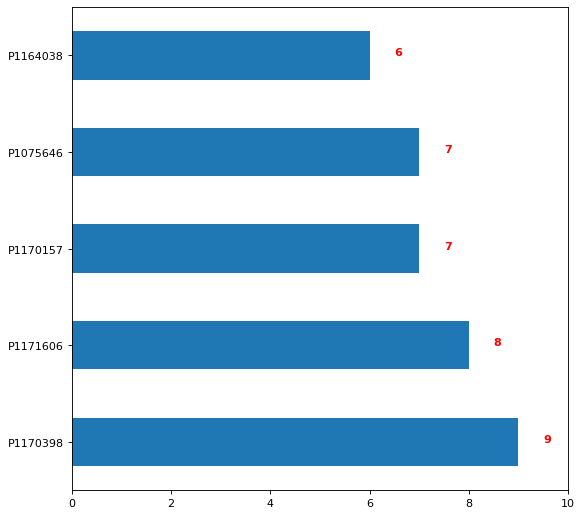

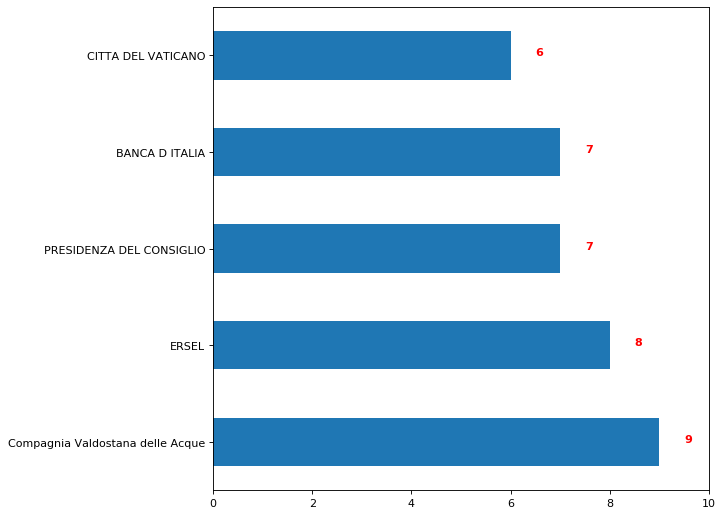

In [9]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=q4['Case Subtype'].value_counts()[:20].plot(kind='barh')
ax.set_xlim(0, 45)
ax.set_xlabel('Cases breakdown by type')
for i, v in enumerate(q4['Case Subtype'].value_counts()):
    ax.text(v+3, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases breakdown by type.png', dpi=500, bbox_inches='tight')
plt.show()

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=q4['Contact Email'].value_counts()[:7].plot(kind='barh')
ax.set_xlim(0, 35)
ax.set_xlabel('Top 7 Users')
ax.set_yticklabels(['Matteo Frare Barutti','Daniele Giorgi','Johan Vitsas','Jesus Cerro', 'Ronald Chenoweth','Stephen Boyle','David Regourd'])
for i, v in enumerate(q4['Contact Email'].value_counts()[:7]):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('Top 7 Users.png', dpi=500, bbox_inches='tight')
plt.show()


figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=q4['Opportunity Name/Number'].value_counts()[:5].plot(kind='barh')
ax.set_xlim(0, 10)
for i, v in enumerate(q4['Opportunity Name/Number'].value_counts()[:5]):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('Top OP IDs.png', dpi=500, bbox_inches='tight')
plt.show()


figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=q4['Opportunity Name/Number'].value_counts()[:5].plot(kind='barh')
ax.set_xlim(0, 10)
ax.set_yticklabels(['Compagnia Valdostana delle Acque','ERSEL','PRESIDENZA DEL CONSIGLIO','BANCA D ITALIA', 'CITTA DEL VATICANO'])
for i, v in enumerate(q4['Opportunity Name/Number'].value_counts()[:5]):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('Top OP IDs by name.png', dpi=500, bbox_inches='tight')
plt.show()


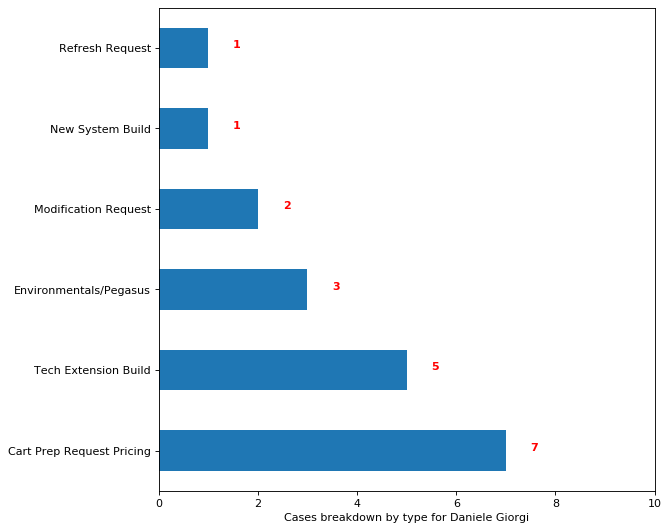

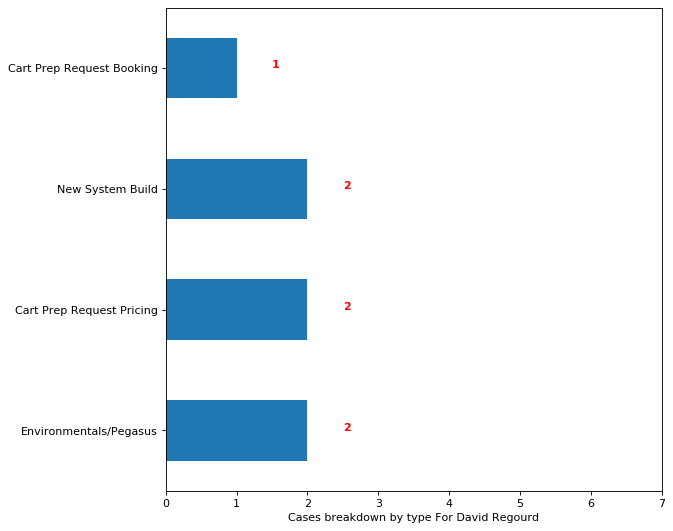

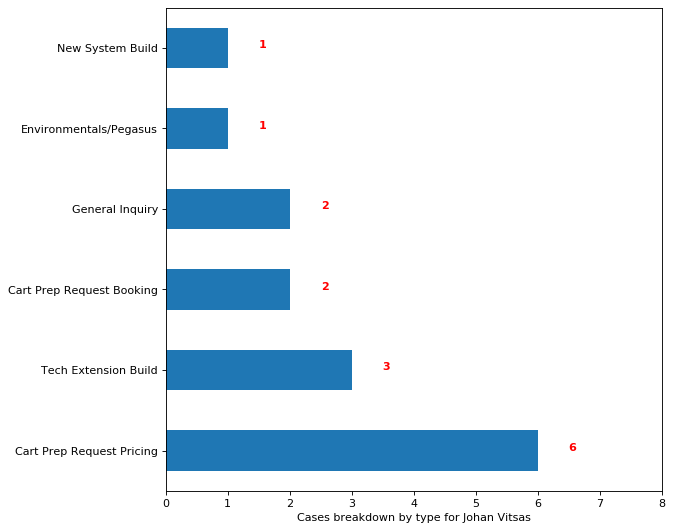

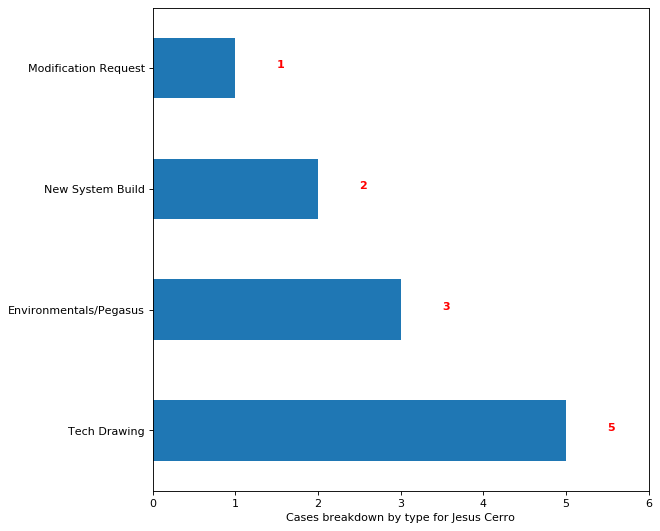

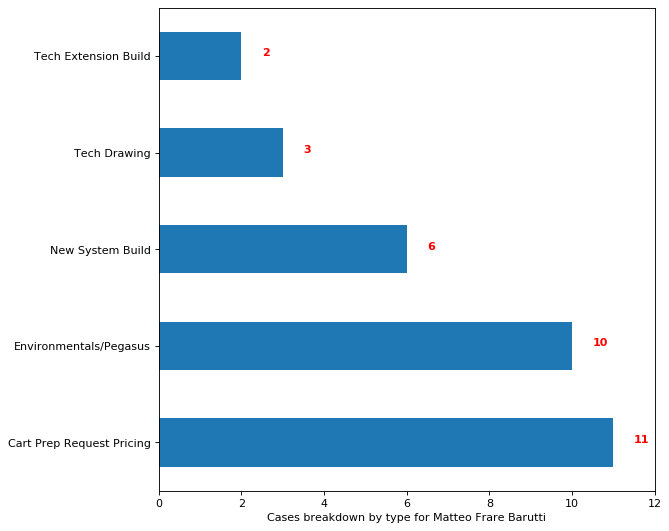

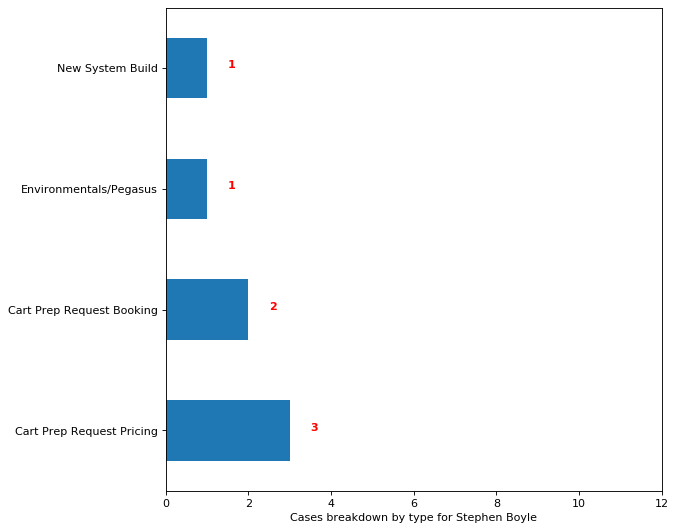

In [10]:
daniele= q4[ q4['Contact Email']== 'daniele.giorgi']
david= q4[ q4['Contact Email']== 'david.regourd']
johan= q4[ q4['Contact Email']== 'johan.vitsas']
jesus= q4[ q4['Contact Email']== 'j.cerro']
matteo= q4[ q4['Contact Email']== 'matteo.frarebarutti']
stephen=q4[ q4['Contact Email']== 'stephen.boyle']


figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=daniele['Case Subtype'].value_counts()[:6].plot(kind='barh')
ax.set_xlim(0, 10)
ax.set_xlabel('Cases breakdown by type for Daniele Giorgi')
#ax.set_xticks([0,1,2,3,4,5,6])
for i, v in enumerate(daniele['Case Subtype'].value_counts()):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases breakdown by type for Daniele Giorgi.png', dpi=500, bbox_inches='tight')
plt.show()

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=david['Case Subtype'].value_counts()[:14].plot(kind='barh')
ax.set_xlim(0, 7)
ax.set_xlabel('Cases breakdown by type For David Regourd')
#ax.set_xticks([0,1,2,3,4,5])
for i, v in enumerate(david['Case Subtype'].value_counts()):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases breakdown by type for David Regourd.png', dpi=500, bbox_inches='tight')
plt.show()

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=johan['Case Subtype'].value_counts()[:9].plot(kind='barh')
ax.set_xlim(0, 8)
ax.set_xlabel('Cases breakdown by type for Johan Vitsas')
#ax.set_xticks([0,1,2,3,4])
for i, v in enumerate(johan['Case Subtype'].value_counts()[:9]):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases breakdown by type for Johan Vitsas.png', dpi=500, bbox_inches='tight')
plt.show()

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=jesus['Case Subtype'].value_counts()[:7].plot(kind='barh')
ax.set_xlim(0, 8)
ax.set_xlabel('Cases breakdown by type for Jesus Cerro')
plt.xlim(0, 6)
#ax.set_xticks([0,1,2,3,4,5,6,7])
for i, v in enumerate(jesus['Case Subtype'].value_counts()):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases breakdown by type for Jesus Cerro.png', dpi=500, bbox_inches='tight')
plt.show()


figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=matteo['Case Subtype'].value_counts()[:7].plot(kind='barh')
ax.set_xlim(0, 12)
ax.set_xlabel('Cases breakdown by type for Matteo Frare Barutti')
#ax.set_xticks([0,1,2,3,4])
for i, v in enumerate(matteo['Case Subtype'].value_counts()):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases breakdown by type for Matteo Frare Barutti.png', dpi=500, bbox_inches='tight')
plt.show()


figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=stephen['Case Subtype'].value_counts()[:7].plot(kind='barh')
ax.set_xlim(0, 12)
ax.set_xlabel('Cases breakdown by type for Stephen Boyle')
#ax.set_xticks([0,1,2,3,4])
for i, v in enumerate(stephen['Case Subtype'].value_counts()):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases breakdown by type for Stephen Boyle.png', dpi=500, bbox_inches='tight')
plt.show()

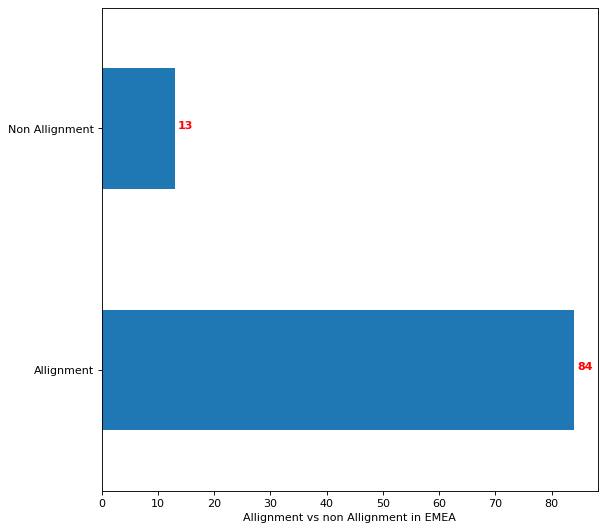

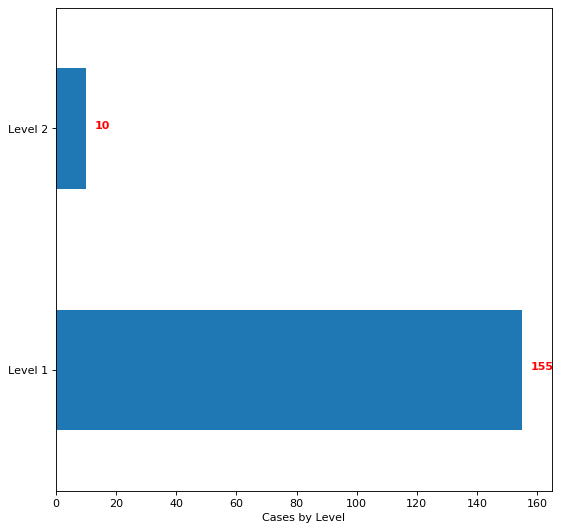

In [11]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=alligninemea['Allignment'].value_counts()[:20].plot(kind='barh')
ax.set_xlabel('Allignment vs non Allignment in EMEA')
for i, v in enumerate(alligninemea['Allignment'].value_counts()):
    ax.text(v+0.5, i, str(v), color='Red', fontweight='bold')
plt.savefig('EMEA Allignment vs non Allignment.png', dpi=500, bbox_inches='tight')
plt.show()



leveldict = {True: 'Level 2', False: 'Level 1'}
q4['Level']=q4['Case Subtype'].isin(['Modification Request','Refresh Request','Expansion/Upgrade'])
q4['Level']=q4['Level'].replace(leveldict)

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax=q4['Level'].value_counts()[:20].plot(kind='barh')
ax.set_xlim(0, 165)
ax.set_xlabel('Cases by Level')
for i, v in enumerate(q4['Level'].value_counts()):
    ax.text(v+3, i, str(v), color='Red', fontweight='bold')
plt.savefig('Cases by Level.png', dpi=500, bbox_inches='tight')
plt.show()